In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time
from tqdm import tqdm

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

In [10]:
import cv2
from PIL import Image

In [3]:
import sys
sys.path.append("C:/git/computer-vision-control/")

# Read images

In [5]:
from glob import glob

In [29]:
hand_files = glob("C:/git/computer-vision-control/images/hand_detection/hand/*.png")
not_hand_files = glob("C:/git/computer-vision-control/images/hand_detection/not_hand/*.png")

In [30]:
len(hand_files)

113

In [31]:
len(not_hand_files)

125

# Camera Image

## Preprocessing

In [158]:
from vision_control.camera import *

In [37]:
img = CameraImage(file_path=hand_files[0])

In [40]:
img.preprocess()

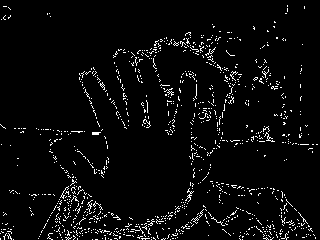

In [41]:
img

## Building the dataset

In [110]:
hand_img = [CameraImage(file_path = file_path,tag = 1) for file_path in hand_files]
not_hand_img = [CameraImage(file_path = file_path,tag = 0) for file_path in not_hand_files]
all_img = hand_img + not_hand_img

In [111]:
images = CameraImages(camera_images=all_img)

In [112]:
images.preprocess()

Preprocessing images: 100%|█████████████████| 238/238 [00:00<00:00, 577.67it/s]


In [113]:
X = images.build_X()

In [114]:
X.shape

(238, 76800)

In [115]:
X = np.divide(X,255)

In [116]:
y = images.build_y()

In [117]:
y.shape

(238, 1)

# Train a simple model

In [118]:
# Keras
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.models import model_from_json

In [119]:
X.shape[1]

76800

In [182]:
model = Sequential()
model.add(Dense(256,input_dim = X.shape[1],activation = "relu"))
# model.add(Dropout(0.25))
model.add(Dense(256,activation = "relu"))
# model.add(Dropout(0.25))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer="sgd", loss='binary_crossentropy',metrics=['accuracy'])

In [183]:
model.fit(X,y,validation_split=0.1,epochs=3,verbose = 2)

Train on 214 samples, validate on 24 samples
Epoch 1/3
2s - loss: 0.6456 - acc: 0.6121 - val_loss: 0.7337 - val_acc: 0.2083
Epoch 2/3
1s - loss: 0.4584 - acc: 0.9626 - val_loss: 0.6829 - val_acc: 0.5000
Epoch 3/3
1s - loss: 0.3253 - acc: 1.0000 - val_loss: 0.6011 - val_acc: 0.7083


# Live test

In [198]:
test = CameraImage(capture = True)

In [199]:
test.preprocess()

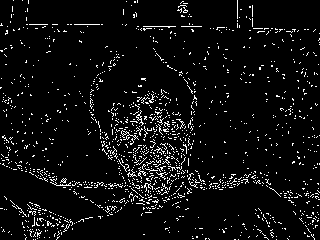

In [200]:
test

In [201]:
test.predict(model)

1/1 [==============================] - 0s


0